In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data Exploring

In [27]:
df = pd.read_csv('/content/heart.csv')

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
df.shape

(1025, 14)

In [30]:
df['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [31]:
df['sex'].unique()

array([1, 0])

In [32]:
df['cp'].unique()

array([0, 1, 2, 3])

In [33]:
df['trestbps'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

In [34]:
df['chol'].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

In [35]:
df['fbs'].unique()

array([0, 1])

In [36]:
df['restecg'].unique()

array([1, 0, 2])

In [37]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

In [38]:
df['exang'].unique()

array([0, 1])

In [39]:
df['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [40]:
df['slope'].unique()

array([2, 0, 1])

In [41]:
df['ca'].unique()

array([2, 0, 1, 3, 4])

In [42]:
df['thal'].unique()

array([3, 2, 1, 0])

In [43]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

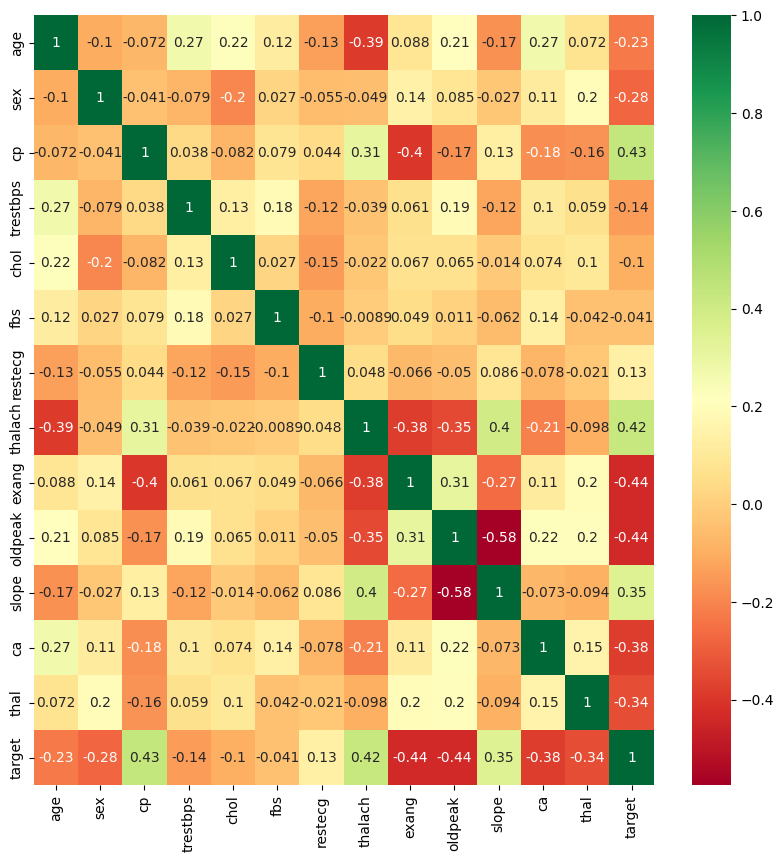

In [45]:
corr = df.corr()
corr_features = corr.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

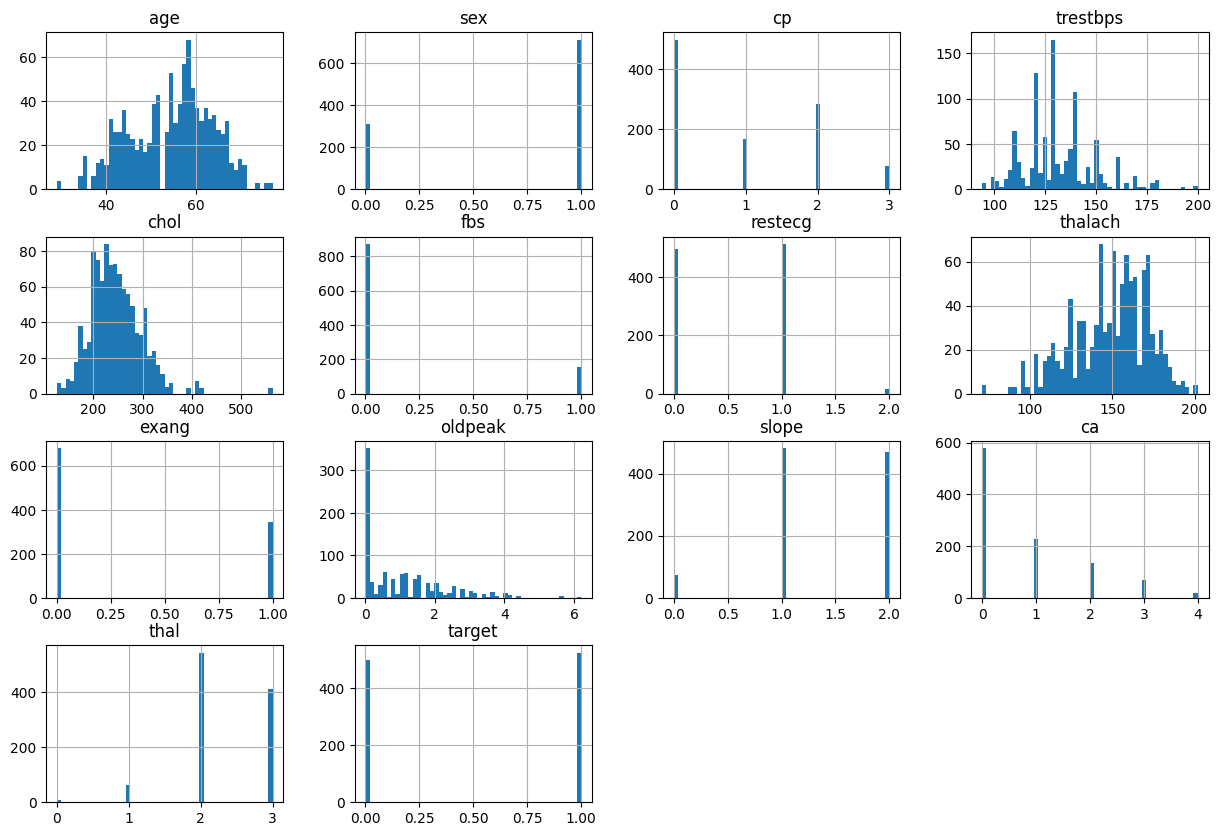

In [46]:
df.hist(bins=50,figsize=(15,10))

In [47]:
#X = feature
#y = label
data = pd.DataFrame(df)

X = data.drop('target', axis=1).values
y = data['target'].values

#print(X)
#print(y)

##Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

##KNN

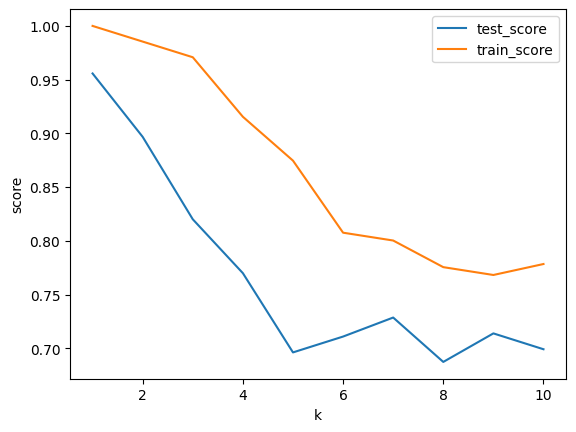

In [54]:
#เลือกค่า k
k_values = np.arange(1,11)
train_score = np.empty(len(k_values))
test_score = np.empty(len(k_values))

for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score[i] = knn.score(X_train,y_train)
    test_score[i] = knn.score(X_test,y_test)


plt.plot(k_values,test_score,label = 'test_score')
plt.plot(k_values,train_score,label = 'train_score')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

In [72]:
knnacc = accuracy_score(y_test, y_knn)
print(f'Accuracy: {knnacc:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_knn))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_knn))


Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       165
           1       0.96      0.95      0.96       174

    accuracy                           0.96       339
   macro avg       0.96      0.96      0.96       339
weighted avg       0.96      0.96      0.96       339


Confusion Matrix:
[[159   6]
 [  9 165]]


## Support Vector Machine

In [63]:
svc =  SVC(kernel='rbf', C=2,probability=True)
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)

In [77]:
svcacc = accuracy_score(y_test, y_svc)
print(f'Accuracy: {svcacc:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_svc))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_svc))

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       165
           1       0.70      0.74      0.72       174

    accuracy                           0.71       339
   macro avg       0.71      0.71      0.71       339
weighted avg       0.71      0.71      0.71       339


Confusion Matrix:
[[111  54]
 [ 45 129]]


##Random Forest Classifier

In [59]:
rf = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=5)
rf.fit(X_train,y_train)
y_rf = rf.predict(X_test)


In [73]:
rtacc = accuracy_score(y_test, y_rf)
print(f'Accuracy: {rtacc:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_rf))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_rf))

Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       165
           1       0.94      0.95      0.95       174

    accuracy                           0.94       339
   macro avg       0.94      0.94      0.94       339
weighted avg       0.94      0.94      0.94       339


Confusion Matrix:
[[155  10]
 [  9 165]]


## Decision Tree

In [67]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 5)
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)

In [78]:
dtacc = accuracy_score(y_test, y_dt)
print(f'Accuracy: {dtacc:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_dt))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_dt))

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       165
           1       0.86      0.92      0.89       174

    accuracy                           0.88       339
   macro avg       0.88      0.88      0.88       339
weighted avg       0.88      0.88      0.88       339


Confusion Matrix:
[[138  27]
 [ 14 160]]


## เปรียบเทียบ Accuracy

In [79]:
model_evaluation = pd.DataFrame({'Model': ['K-Nearest Neighbour','Support Vector Machine','Random Forest','Decision Tree'], 'Accuracy': [knnacc,svcacc,rtacc,dtacc]})
model_evaluation

px.bar(data_frame = model_evaluation, x = 'Accuracy', y = 'Model', color = 'Accuracy', template = 'seaborn', title = 'Models Comparison')